<a href="https://colab.research.google.com/github/tizianofucci/A2NDLSegmentation/blob/main/Notebook/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os

# os.environ["CUDA_VISIBLE_DEVICES"]="-1" 
import tensorflow as tf
import numpy as np

# Set the seed for random operations. 
# This let our experiments to be reproducible. 
SEED = 1234
tf.random.set_seed(SEED)  

In [3]:
cwd = os.getcwd()

# Example: Image Segmentation
## Build segmentation

In [4]:
import starting_kit.read_mask_example as rme
import starting_kit.prepare_submission as ps
import shutil
import random
import json
import math

SEED = 1234
tf.random.set_seed(SEED)  

# Get current working directory
cwd = os.path.join(os.path.dirname(os.getcwd()),"Development_Dataset")

#Save all possible path in order to be able to cycle over them
test_dir = {}
dataset_dir = {}
patches_dir = {}

dataset_dir[0] = os.path.join(cwd,'Training/Bipbip/Mais')
dataset_dir[1] = os.path.join(cwd,'Training/Bipbip/Haricot')

patches_dir[0] = '/content/drive/MyDrive/Mais'
patches_dir[1] = '/content/drive/MyDrive/Haricot'

test_dir[0] = os.path.join(cwd,'Test_Dev/Bipbip/Mais')
test_dir[1] = os.path.join(cwd,'Test_Dev/Bipbip/Haricot')
test_dir[2] = os.path.join(cwd,'Test_Dev/Pead/Mais')
test_dir[3] = os.path.join(cwd,'Test_Dev/Pead/Haricot')
test_dir[4] = os.path.join(cwd,'Test_Dev/Roseau/Mais')
test_dir[5] = os.path.join(cwd,'Test_Dev/Roseau/Haricot')
test_dir[6] = os.path.join(cwd,'Test_Dev/Weedelec/Mais')
test_dir[7] = os.path.join(cwd,'Test_Dev/Weedelec/Haricot')

crops = {}

crops[0] = "Mais"
crops[1] = "Haricot"

teams = {}

teams[0] = "Bipbip"
teams[1] = "Pead"
teams[2] = "Roseau"
teams[3] = "Weedelec"


In [5]:
print(dataset_dir)
print(test_dir)

{0: 'C:\\Users\\ASUS\\Documents\\Università\\ANNDL\\A2NDLSegmentation\\Development_Dataset\\Training/Bipbip/Mais', 1: 'C:\\Users\\ASUS\\Documents\\Università\\ANNDL\\A2NDLSegmentation\\Development_Dataset\\Training/Bipbip/Haricot'}
{0: 'C:\\Users\\ASUS\\Documents\\Università\\ANNDL\\A2NDLSegmentation\\Development_Dataset\\Test_Dev/Bipbip/Mais', 1: 'C:\\Users\\ASUS\\Documents\\Università\\ANNDL\\A2NDLSegmentation\\Development_Dataset\\Test_Dev/Bipbip/Haricot', 2: 'C:\\Users\\ASUS\\Documents\\Università\\ANNDL\\A2NDLSegmentation\\Development_Dataset\\Test_Dev/Pead/Mais', 3: 'C:\\Users\\ASUS\\Documents\\Università\\ANNDL\\A2NDLSegmentation\\Development_Dataset\\Test_Dev/Pead/Haricot', 4: 'C:\\Users\\ASUS\\Documents\\Università\\ANNDL\\A2NDLSegmentation\\Development_Dataset\\Test_Dev/Roseau/Mais', 5: 'C:\\Users\\ASUS\\Documents\\Università\\ANNDL\\A2NDLSegmentation\\Development_Dataset\\Test_Dev/Roseau/Haricot', 6: 'C:\\Users\\ASUS\\Documents\\Università\\ANNDL\\A2NDLSegmentation\\Developm

from PIL import Image
import shutil

tf.compat.v1.disable_eager_execution()
img_h_ = 1536
img_w_ = 2048


img_h = 768
img_w = 512

create_patches = True

if (create_patches == True) :
  for i in range(0,2):
      image_filenames = next(os.walk(os.path.join(dataset_dir[i],"Images/")))[2]
      for image_name in image_filenames:
      
      
      
          image_name=image_name[:-4]
          img = Image.open(os.path.join(dataset_dir[i], 'Images', image_name + ".jpg"))
          mask = Image.open(os.path.join(dataset_dir[i], 'Masks', image_name + '.png'))

          # Resize image and mask
          img = img.resize([img_w_,img_h_])
          
          img_arr = tf.expand_dims(np.array(img), 0)
          


          mask_arr = tf.expand_dims(np.array(mask), 0)



          patches = tf.image.extract_patches(images=img_arr,
                            sizes=[1, img_h, img_w, 1],
                            strides=[1, img_h-10, img_w-10, 1],
                            rates=[1, 1, 1, 1],
                            padding='VALID')
          
          patches_mask = tf.image.extract_patches(images=mask_arr,
                            sizes=[1, img_h, img_w, 1],
                            strides=[1, img_h-10, img_w-10, 1],
                            rates=[1, 1, 1, 1],
                            padding='VALID')
          patches = tf.reshape(patches, [8, 768, 512, 3])

          patches_mask = tf.reshape(patches_mask, [8, 768, 512, 3])


          for j in range(0,8):
            image = tf.io.encode_jpeg(patches[j])
            writer = tf.io.write_file(os.path.join(patches_dir[i], 'Images',image_name+'patch'+str(j)+'.jpg'),image)
            with tf.compat.v1.Session() as sess:
              sess.run(writer)

            msk = tf.io.encode_png(patches_mask[j])
            writer = tf.io.write_file(os.path.join(patches_dir[i], 'Masks',image_name+'patch'+str(j)+'.png'), msk)
            with tf.compat.v1.Session() as sess:
              sess.run(writer)
else:
  for i in range(0,2):
    
    tf.compat.v1.gfile.DeleteRecursively(os.path.join(dataset_dir[i], 'Images'))
    tf.compat.v1.gfile.DeleteRecursively(os.path.join(dataset_dir[i], 'Masks'))
    shutil.copytree(os.path.join(patches_dir[i], 'Masks'), os.path.join(dataset_dir[i], 'Masks'))
    shutil.copytree(os.path.join(patches_dir[i], 'Images'), os.path.join(dataset_dir[i], 'Images'))

In [6]:
#!zip -r "/content/drive/MyDrive/New_Development_Dataset.zip" "/content/Development_Dataset"

In [7]:
# ImageDataGenerator
# ------------------

from tensorflow.keras.preprocessing.image import ImageDataGenerator

apply_data_augmentation = True

# Create training ImageDataGenerator object
# We need two different generators for images and corresponding masks
if apply_data_augmentation:
    img_data_gen = ImageDataGenerator(rotation_range=10,
                                      width_shift_range=10,
                                      height_shift_range=10,
                                      zoom_range=0.3,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                      fill_mode='reflect')
    mask_data_gen = ImageDataGenerator(rotation_range=10,
                                       width_shift_range=10,
                                       height_shift_range=10,
                                       zoom_range=0.3,
                                       horizontal_flip=True,
                                       vertical_flip=True,
                                       fill_mode='reflect')

In [8]:
from PIL import Image

class CustomDataset(tf.keras.utils.Sequence):

    """
        CustomDataset inheriting from tf.keras.utils.Sequence.

        3 main methods:
          - __init__: save dataset params like directory, filenames..
          - __len__: return the total number of samples in the dataset
          - __getitem__: return a sample from the dataset

        Note: 
          - the custom dataset return a single sample from the dataset. Then, we use 
            a tf.data.Dataset object to group samples into batches.
          - in this case we have a different structure of the dataset in memory. 
            We have all the images in the same folder and the training and validation splits
            are defined in text files.

      """

    def __init__(self, dataset_dir, which_subset, img_generator=None, mask_generator=None, 
                preprocessing_function=None, out_shape=[256, 256]):
        if which_subset == 'training':
            subset_file = os.path.join(dataset_dir, 'Splits', 'train.txt')
        elif which_subset == 'validation':
            subset_file = os.path.join(dataset_dir, 'Splits', 'val.txt')
    
        with open(subset_file, 'r') as f:
            lines = f.readlines()
    
        subset_filenames = []
        for line in lines:
            subset_filenames.append(line.strip()) 

        self.which_subset = which_subset
        self.dataset_dir = dataset_dir
        self.subset_filenames = subset_filenames
        self.img_generator = img_generator
        self.mask_generator = mask_generator
        self.preprocessing_function = preprocessing_function
        self.out_shape = out_shape

    def __len__(self):
        return len(self.subset_filenames)

    def __getitem__(self, index):
        # Read Image
        curr_filename = self.subset_filenames[index]
        img = Image.open(os.path.join(self.dataset_dir, 'Images', curr_filename + '.jpg'))
        #mask = rme.read_rgb_mask(os.path.join(self.dataset_dir, 'Masks', curr_filename + '.png'))

        # Resize image and mask
        img = img.resize(self.out_shape)
        

        
       # mask = mask.resize(self.out_shape)
    
        img_arr = np.array(img)
        mask_arr = rme.read_rgb_mask(os.path.join(self.dataset_dir, 'Masks', curr_filename + '.png'),self.out_shape)
        #print(mask_arr.shape)
  

        mask_arr = np.expand_dims(mask_arr, -1)

        if self.which_subset == 'training':
            if self.img_generator is not None and self.mask_generator is not None:
                # Perform data augmentation
                # We can get a random transformation from the ImageDataGenerator using get_random_transform
                # and we can apply it to the image using apply_transform
                img_t = self.img_generator.get_random_transform(img_arr.shape, seed=SEED)
                mask_t = self.mask_generator.get_random_transform(mask_arr.shape, seed=SEED)
                img_arr = self.img_generator.apply_transform(img_arr, img_t)
                # ImageDataGenerator use bilinear interpolation for augmenting the images.
                # Thus, when applied to the masks it will output 'interpolated classes', which
                # is an unwanted behaviour. As a trick, we can transform each class mask 
                # separately and then we can cast to integer values (as in the binary segmentation notebook).
                # Finally, we merge the augmented binary masks to obtain the final segmentation mask.
                out_mask = np.zeros_like(mask_arr)
                for c in np.unique(mask_arr):
                    if c > 0:
                        curr_class_arr = np.float32(mask_arr == c)
                        curr_class_arr = self.mask_generator.apply_transform(curr_class_arr, mask_t)
                        # from [0, 1] to {0, 1}
                        curr_class_arr = np.uint8(curr_class_arr)
                        # recover original class
                        curr_class_arr = curr_class_arr * c 
                        out_mask += curr_class_arr
        else:
            out_mask = mask_arr
    
        if self.preprocessing_function is not None:
            img_arr = self.preprocessing_function(img_arr)
        
        return img_arr, np.float32(out_mask)

In [9]:
for j in range (0,2):
    if not os.path.exists(os.path.join(dataset_dir[j],"Splits/")):
        os.makedirs(os.path.join(dataset_dir[j],"Splits/"))


    image_filenames = next(os.walk(os.path.join(dataset_dir[j],"Images/")))[2]
    
    val=[]
    train=[]
    
    for image_name in image_filenames:
        if 100*random.random() < 10:
            val.append(image_name[:-4])
        else:
            train.append(image_name[:-4])
    
    with open(os.path.join(dataset_dir[j],"Splits","train.txt"), 'w') as file:  # Use file to refer to the file object
        for i in train:
            file.write(str(i)+"\n")
    
    with open(os.path.join(dataset_dir[j],"Splits","val.txt"), 'w') as file:  # Use file to refer to the file object
        for i in val:
            file.write(str(i)+"\n")

   

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

In [10]:
#Creation of dataset generators (the commented line are the ones for getting also the haricot Dataset)

from tensorflow.keras.applications.vgg16 import preprocess_input 

img_h = 768
img_w = 512

dataset = CustomDataset(dataset_dir[0], 'training', 
                        img_generator=img_data_gen, mask_generator=mask_data_gen,
                        preprocessing_function=preprocess_input, out_shape=[img_w,img_h])

#dataset1 = CustomDataset(dataset_dir[1], 'training', 
#                        img_generator=img_data_gen, mask_generator=mask_data_gen,
#                        preprocessing_function=None, out_shape=[img_w,img_h])

dataset_valid = CustomDataset(dataset_dir[0], 'validation', 
                              preprocessing_function=preprocess_input,out_shape=[img_w,img_h])

#dataset_valid1 = CustomDataset(dataset_dir[1], 'validation', 
#                              preprocessing_function=None,out_shape=[img_w,img_h])


In [11]:
#Creation of datasets (the commented line are the ones for getting also the haricot Dataset)



train_dataset0 = tf.data.Dataset.from_generator(lambda: dataset,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([img_h, img_w, 3], [img_h, img_w, 1]))

#train_dataset1 = tf.data.Dataset.from_generator(lambda: dataset1,
#                                               output_types=(tf.float32, tf.float32),
#                                               output_shapes=([img_h, img_w, 3], [img_h, img_w, 1]))

#train_dataset = train_dataset0.concatenate(train_dataset1)

train_dataset0 = train_dataset0.batch(1)

train_dataset0 = train_dataset0.repeat()

valid_dataset0 = tf.data.Dataset.from_generator(lambda: dataset_valid,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([img_h, img_w, 3], [img_h, img_w, 1]))
#valid_dataset1 = tf.data.Dataset.from_generator(lambda: dataset_valid1,
#                                               output_types=(tf.float32, tf.float32),
#                                               output_shapes=([img_h, img_w, 3], [img_h, img_w, 1]))

#valid_dataset = valid_dataset0.concatenate(valid_dataset1)

valid_dataset0 = valid_dataset0.batch(1)

valid_dataset0 = valid_dataset0.repeat()

In [12]:
# Let's test data generator
# -------------------------

import time
from matplotlib import cm
import matplotlib.pyplot as plt

%matplotlib inline


# Assign a color to each class
evenly_spaced_interval = np.linspace(0, 1, 3)
colors = [cm.rainbow(x) for x in evenly_spaced_interval]

iterator = iter(valid_dataset0)

[0. 1. 2.]


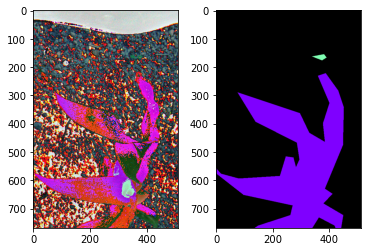

2


In [13]:
fig, ax = plt.subplots(1, 2)

augmented_img, target = next(iterator)
augmented_img = augmented_img[0]   # First element
augmented_img = augmented_img  # denormalize

target = np.array(target[0, ..., 0])   # First element (squeezing channel dimension)

print(np.unique(target))

target_img = np.zeros([target.shape[0], target.shape[1], 3])

target_img[np.where(target == 0)] = [0, 0, 0]
for i in range(1, 3):
  target_img[np.where(target == i)] = np.array(colors[i-1])[:3] * 255

ax[0].imshow(np.uint8(augmented_img))
ax[1].imshow(np.uint8(target_img))

plt.show()

print(np.max(np.uint8(target)))

In [30]:
#Loading of VGG that will be used as a Backbone
vgg = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_h, img_w, 3))

# for layer in vgg.layers:
#   layer.trainable = False
freeze_until = 17 # layer from which we want to fine-tune

for layer in vgg.layers[:freeze_until]:
    layer.trainable = False
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 768, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 768, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 768, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 384, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 384, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 384, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 192, 128, 128)     0     

In [31]:
def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

In [32]:
# This function is used for creating a model without skip connections
def create_model(depth, start_f, num_classes):

    model = tf.keras.Sequential()
    
    # Encoder
    # -------
    model.add(vgg)
    
    start_f = 256
        
    # Decoder
    # -------
    for i in range(depth):
        model.add(tf.keras.layers.UpSampling2D(2, interpolation='bilinear'))
        model.add(tf.keras.layers.Conv2D(filters=start_f,
                                         kernel_size=(3, 3),
                                         strides=(1, 1),
                                         padding='same'))
        model.add(tf.keras.layers.ReLU())

        start_f = start_f // 2

    # Prediction Layer
    # ----------------
    model.add(tf.keras.layers.Conv2D(filters=num_classes,
                                     kernel_size=(1, 1),
                                     strides=(1, 1),
                                     padding='same',
                                     activation='softmax'))
    
    return model

In [33]:
def upsample(filters, size, norm_type='batchnorm', apply_dropout=False):
  """
      creates an upsample layer for the model, 
  """
  initializer = tf.keras.initializers.GlorotNormal()

  result = tf.keras.Sequential()
  result.add(tf.keras.layers.UpSampling2D(2, interpolation='bilinear'))
  result.add(tf.keras.layers.Conv2D(filters=filters,
                                         kernel_size=(3, 3),
                                         strides=(1, 1),
                                         padding='same', kernel_initializer=initializer))

  result.add(tf.keras.layers.ReLU())

  return result

In [34]:
from tensorflow_examples.models.pix2pix import pix2pix

from IPython.display import clear_output

base_model = vgg

# Use the activations of these layers
layer_names = [
    'block1_conv2',
    'block2_conv2',   # 384x256
    'block3_conv3',   # 192x128
    'block4_conv3',  # 96x64
    'block5_conv3',      # 48x32
]
layers = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

#down_stack.trainable = False


up_stack = [
    upsample(512, 3),  # 4x4 -> 8x8
    upsample(256, 3),  # 8x8 -> 16x16
    upsample(128, 3),
    upsample(64, 3)  # 16x16 -> 32x32
]

def unet_model(output_channels):
  inputs = tf.keras.layers.Input(shape=[img_h, img_w, 3])
  x = inputs

  # Downsampling through the model
  skips = down_stack(x)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # This is the last layer of the model
  last = tf.keras.layers.Conv2D(filters=output_channels,
                                         kernel_size=(1, 1),
                                         strides=(1, 1),
                                         padding='same',
                                         activation='softmax') 

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

model = unet_model(3)

In [35]:
# Visualize created model as a table

# Randomly initializes the weights, drawing them from a normal distribution
# initializer = tf.keras.initializers.GlorotNormal()

# def get_crop_shape(target, refer):
#         # width, the 3rd dimension
#         cw = (target.get_shape()[2] - refer.get_shape()[2])
#         assert (cw >= 0)
#         if cw % 2 != 0:
#             cw1, cw2 = int(cw/2), int(cw/2) + 1
#         else:
#             cw1, cw2 = int(cw/2), int(cw/2)
#         # height, the 2nd dimension
#         ch = (target.get_shape()[1] - refer.get_shape()[1])
#         assert (ch >= 0)
#         if ch % 2 != 0:
#             ch1, ch2 = int(ch/2), int(ch/2) + 1
#         else:
#             ch1, ch2 = int(ch/2), int(ch/2)

#         return (ch1, ch2), (cw1, cw2)


# concat_axis = 3
# inputs = tf.keras.layers.Input(shape = [img_h,img_w,3])

# conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1_1', kernel_initializer=initializer)(inputs)
# conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer=initializer)(conv1)
# pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
# conv2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer=initializer)(pool1)
# conv2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer=initializer)(conv2)
# pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

# conv3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer=initializer)(pool2)
# conv3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer=initializer)(conv3)
# pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)

# conv4 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer=initializer)(pool3)
# conv4 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer=initializer)(conv4)
# pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv4)

# conv5 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer=initializer)(pool4)
# conv5 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer=initializer)(conv5)

# up_conv5 = tf.keras.layers.UpSampling2D(size=(2, 2))(conv5)
# ch, cw = get_crop_shape(conv4, up_conv5)
# crop_conv4 = tf.keras.layers.Cropping2D(cropping=(ch,cw))(conv4)
# up6 = tf.keras.layers.concatenate([up_conv5, crop_conv4], axis=concat_axis)
# conv6 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer=initializer)(up6)
# conv6 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer=initializer)(conv6)

# up_conv6 = tf.keras.layers.UpSampling2D(size=(2, 2))(conv6)
# ch, cw = get_crop_shape(conv3, up_conv6)
# crop_conv3 = tf.keras.layers.Cropping2D(cropping=(ch,cw))(conv3)
# up7 = tf.keras.layers.concatenate([up_conv6, crop_conv3], axis=concat_axis) 
# conv7 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer=initializer)(up7)
# conv7 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer=initializer)(conv7)

# up_conv7 = tf.keras.layers.UpSampling2D(size=(2, 2))(conv7)
# ch, cw = get_crop_shape(conv2, up_conv7)
# crop_conv2 = tf.keras.layers.Cropping2D(cropping=(ch,cw))(conv2)
# up8 = tf.keras.layers.concatenate([up_conv7, crop_conv2], axis=concat_axis)
# conv8 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer=initializer)(up8)
# conv8 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer=initializer)(conv8)

# up_conv8 = tf.keras.layers.UpSampling2D(size=(2, 2))(conv8)
# ch, cw = get_crop_shape(conv1, up_conv8)
# crop_conv1 = tf.keras.layers.Cropping2D(cropping=(ch,cw))(conv1)
# up9 = tf.keras.layers.concatenate([up_conv8, crop_conv1], axis=concat_axis)
# conv9 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer=initializer)(up9)
# conv9 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer=initializer)(conv9)

# ch, cw = get_crop_shape(inputs, conv9)
# conv9 = tf.keras.layers.ZeroPadding2D(padding=((ch[0], ch[1]), (cw[0], cw[1])))(conv9)
# conv10 = tf.keras.layers.Conv2D(3, (1, 1), kernel_initializer=initializer)(conv9)

# model = tf.keras.models.Model(inputs=inputs, outputs=conv10)

# Visualize created model as a table

In [36]:
# model = create_model(depth=5, 
#                       start_f=8, 
#                       num_classes=3)

In [37]:
model.summary()

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 768, 512, 3) 0                                            
__________________________________________________________________________________________________
functional_9 (Functional)       [(None, 768, 512, 64 14714688    input_5[0][0]                    
__________________________________________________________________________________________________
sequential_8 (Sequential)       (None, 96, 64, 512)  2359808     functional_9[0][4]               
__________________________________________________________________________________________________
concatenate_8 (Concatenate)     (None, 96, 64, 1024) 0           sequential_8[0][0]               
                                                                 functional_9[0][3]   

In [38]:
# Optimization params
# -------------------

# Loss
# Sparse Categorical Crossentropy to use integers (mask) instead of one-hot encoded labels
loss = tf.keras.losses.SparseCategoricalCrossentropy() 


# learning rate
lr = 1e-6
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
# -------------------

# Here we define the intersection over union for each class in the batch.
# Then we compute the final iou as the mean over classes
def meanIoU(y_true, y_pred):
    # get predicted class from softmax
    y_pred = tf.expand_dims(tf.argmax(y_pred, -1), -1)

    per_class_iou = []

    for i in range(1,3): # exclude the background class 0
      # Get prediction and target related to only a single class (i)
      class_pred = tf.cast(tf.where(y_pred == i, 1, 0), tf.float32)
      class_true = tf.cast(tf.where(y_true == i, 1, 0), tf.float32)
      intersection = tf.reduce_sum(class_true * class_pred)
      union = tf.reduce_sum(class_true) + tf.reduce_sum(class_pred) - intersection
    
      iou = (intersection + 1e-7) / (union + 1e-7)
      per_class_iou.append(iou)

    return tf.reduce_mean(per_class_iou)

# Validation metrics
# ------------------
metrics = ['accuracy', meanIoU]
# ------------------

weights = [150,2,6]


# Compile Model
model.compile(optimizer=optimizer, loss=loss , metrics=metrics, loss_weights=weights)

In [ ]:
import os
from datetime import datetime

cwd1 = os.getcwd()

exps_dir = os.path.join(cwd1, 'multiclass_exps')
if not os.path.exists(exps_dir):
    os.makedirs(exps_dir)

now = datetime.now().strftime('%b%d_%H-%M-%S')

model_name = 'CNN'

exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)
    
callbacks = []

# Model checkpoint
# ----------------
ckpt_dir = os.path.join(exp_dir, 'ckpts')
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)

ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp.ckpt'), 
                                                   save_weights_only=True)  # False to save the model directly
callbacks.append(ckpt_callback)

# Visualize Learning on Tensorboard
# ---------------------------------
tb_dir = os.path.join(exp_dir, 'tb_logs')
if not os.path.exists(tb_dir):
    os.makedirs(tb_dir)
    
# By default shows losses and metrics for both training and validation
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir,
                                             profile_batch=0,
                                             histogram_freq=0)  # if 1 shows weights histograms
callbacks.append(tb_callback)

# Early Stopping
# --------------
early_stop = True
if early_stop:
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_meanIoU', patience=20, mode="max")
    callbacks.append(es_callback)


model.fit(x=train_dataset0,
          epochs=100,  #### set repeat in training dataset
          steps_per_epoch=len(dataset),#+len(dataset1)
          validation_data=valid_dataset0,
          validation_steps=len(dataset_valid), #+len(dataset_valid1)
          callbacks=callbacks)

# How to visualize Tensorboard

# 1. tensorboard --logdir EXPERIMENTS_DIR --port PORT     <- from terminal
# 2. localhost:PORT   <- in your browser

Epoch 1/100
564/653 [========================>.....] - ETA: 1:25 - loss: 874.0383 - accuracy: 0.6317 - meanIoU: 0.0779

import time
import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

iterator = iter(valid_dataset)

C:\Users\ASUS\anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


(1, 768, 512, 3)

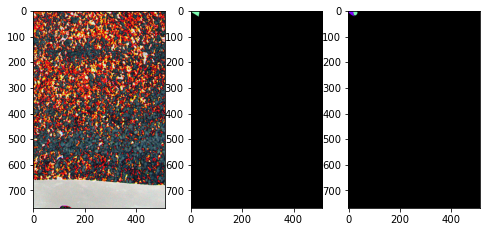

In [54]:
#model.load_weights(os.path.join(os.getcwd(),'multiclass_exps/CNN_Dec15_01-23-05/ckpts/cp.ckpt'))

fig, ax = plt.subplots(1, 3, figsize=(8, 8))
fig.show()
image, target = next(iterator)

image = image[0]
target = target[0, ..., 0]

out_sigmoid = model.predict(x=tf.expand_dims(image, 0))

# Get predicted class as the index corresponding to the maximum value in the vector probability
# predicted_class = tf.cast(out_sigmoid > score_th, tf.int32)
# predicted_class = predicted_class[0, ..., 0]
predicted_class = tf.argmax(out_sigmoid, -1)

out_sigmoid.shape

predicted_class = predicted_class[0, ...]

# Assign colors (just for visualization)
target_img = np.zeros([target.shape[0], target.shape[1], 3])
prediction_img = np.zeros([target.shape[0], target.shape[1], 3])

target_img[np.where(target == 0)] = [0, 0, 0]
for i in range(1, 3):
  target_img[np.where(target == i)] = np.array(colors[i-1])[:3] * 255

prediction_img[np.where(predicted_class == 0)] = [0, 0, 0]
for i in range(1, 3):
  prediction_img[np.where(predicted_class == i)] = np.array(colors[i-1])[:3] * 255

ax[0].imshow(np.uint8(image))
ax[1].imshow(np.uint8(target_img))
ax[2].imshow(np.uint8(prediction_img))

fig.canvas.draw()
time.sleep(1)

In [43]:
submission_dict = {} 

for i in range(0,8):
    image_filenames = next(os.walk(os.path.join(test_dir[i],"Images/")))[2]

    if i in range(4,6):
        suffix = ".png"
    else:
        suffix = ".jpg"
    
    print (suffix)
    for image_name in image_filenames:
    
    
        image_name=image_name[:-4]
        img = Image.open(os.path.join(test_dir[i], 'Images', image_name + suffix))
        #mask = rme.read_rgb_mask(os.path.join(self.dataset_dir, 'Masks', curr_filename + '.png'))

        # Resize image and mask
        img = img.resize([2048,1536])
        

        
        # mask = mask.resize(self.out_shape)
    
        img_arr = preprocess_input( tf.expand_dims(np.array(img), 0))


        patches = tf.image.extract_patches(images=img_arr,
                                sizes=[1, img_h, img_w, 1],
                                strides=[1, img_h, img_w, 1],
                                rates=[1, 1, 1, 1],
                                padding='VALID')
        patches = tf.reshape(patches, [8, 768, 512, 3])

        predictions = []

        for j in range (0,8):
            out_sigmoid = model.predict(x=tf.expand_dims(patches[j],0))

            predicted_class = np.argmax(out_sigmoid, -1)
            predicted_class = predicted_class[0, ...]



            predictions.append(predicted_class)



        total = tf.concat([predictions[0], predictions[4]], 0)

        for x in range (1,4):
            result=tf.concat([predictions[x], predictions[x+4]], 0)
            total=tf.concat([total, result], 1)
    
        mask_arr = np.array(total)
        submission_dict[image_name] = {}
        submission_dict[image_name]['shape'] = [1536,2048]
        submission_dict[image_name]['team'] = teams[math.floor(i/2)]
        submission_dict[image_name]['crop'] = crops[i%2]
        submission_dict[image_name]['segmentation'] = {}

        # RLE encoding
        # crop
        rle_encoded_crop = ps.rle_encode(mask_arr == 1)
        # weed
        rle_encoded_weed = ps.rle_encode(mask_arr == 2)

        submission_dict[image_name]['segmentation']['crop'] = rle_encoded_crop
        submission_dict[image_name]['segmentation']['weed'] = rle_encoded_weed

        # Please notice that in this example we have a single prediction.
        # For the competition you have to provide segmentation for each of
        # the test images.

        # Finally, save the results into the submission.json file
with open(os.path.join(dataset_dir[0],"submission.json"), 'w') as f:
    json.dump(submission_dict, f)
    
    

.jpg
.jpg
.jpg
.jpg
.png
.png
.jpg
.jpg


image_filenames = next(os.walk(os.path.join(test_dir,"Images/")))[2]

for image_name in image_filenames:
    image_name=image_name[:-4]
    img = Image.open(os.path.join(test_dir, 'Images', image_name + '.jpg'))
    #mask = rme.read_rgb_mask(os.path.join(self.dataset_dir, 'Masks', curr_filename + '.png'))

    # Resize image and mask
    img = img.resize([img_w,img_h])
        

        
    # mask = mask.resize(self.out_shape)
    
    img_arr = np.array(img)
    model.predict(x=tf.expand_dims(img_arr, 0))

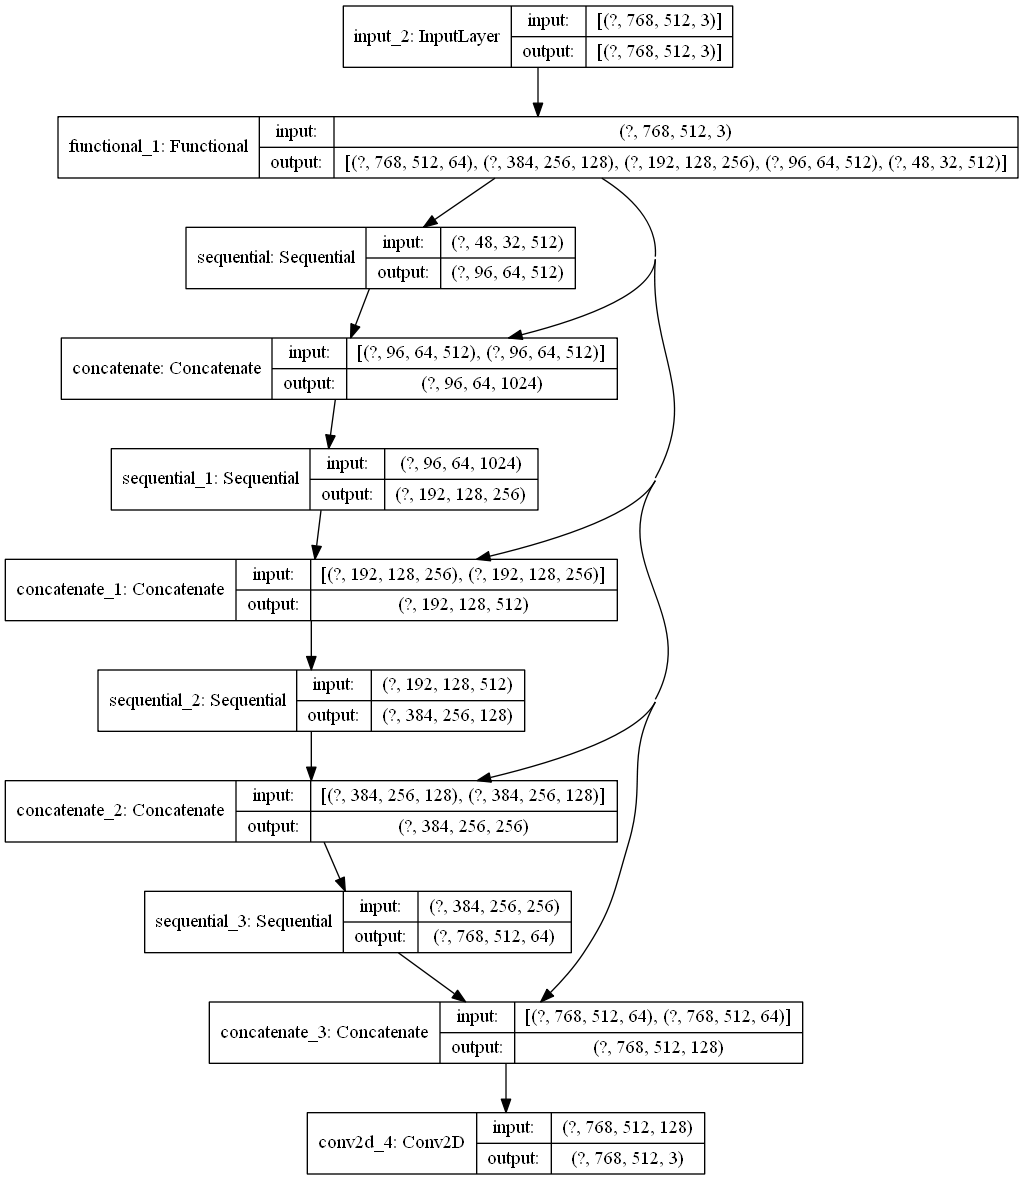

In [24]:

tf.keras.utils.plot_model(model, show_shapes=True)


C:\Users\ASUS\anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


(1, 768, 512, 3)

(1, 768, 512, 3)

(1, 768, 512, 3)

(1, 768, 512, 3)

(1, 768, 512, 3)

(1, 768, 512, 3)

(1, 768, 512, 3)

(1, 768, 512, 3)

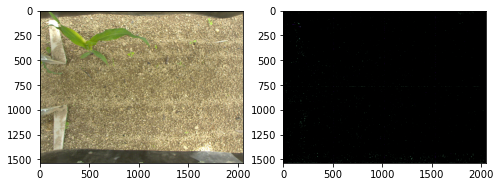

In [25]:
#model.load_weights(os.path.join(os.getcwd(),'multiclass_exps/CNN_Dec15_01-23-05/ckpts/cp.ckpt'))

fig, ax = plt.subplots(1, 2, figsize=(8, 8))
fig.show()

image = Image.open(os.path.join(test_dir[0], 'Images/Bipbip_mais_im_01931.jpg'))
#mask = rme.read_rgb_mask(os.path.join(self.dataset_dir, 'Masks', curr_filename + '.png'))
         

img_arr = preprocess_input( tf.expand_dims(np.array(image), 0))


patches = tf.image.extract_patches(images=img_arr,
                        sizes=[1, img_h, img_w, 1],
                        strides=[1, img_h, img_w, 1],
                        rates=[1, 1, 1, 1],
                        padding='VALID')
patches = tf.reshape(patches, [8, 768, 512, 3])


# Resize image and mask
#image = image.resize([img_w,img_h])

predictions = []

for j in range (0,8):
    out_sigmoid = model.predict(x=tf.expand_dims(patches[j],0))

    # Get predicted class as the index corresponding to the maximum value in the vector probability
    # predicted_class = tf.cast(out_sigmoid > score_th, tf.int32)
    # predicted_class = predicted_class[0, ..., 0]
    predicted_class = tf.argmax(out_sigmoid, -1)

    out_sigmoid.shape

    predicted_class = predicted_class[0, ...]

    prediction_img = np.zeros([img_h, img_w, 3])


    prediction_img[np.where(predicted_class == 0)] = [0, 0, 0]
    for i in range(1, 3):
      prediction_img[np.where(predicted_class == i)] = np.array(colors[i-1])[:3] * 255

#     ax[0].imshow(np.uint8(patches[j]))
#     ax[1].imshow(np.uint8(prediction_img))

    predictions.append(prediction_img)
    
    fig.canvas.draw()
    time.sleep(1)
    
total = tf.concat([predictions[0], predictions[4]], 0)

for x in range (1,4):
    result=tf.concat([predictions[x], predictions[x+4]], 0)
    total=tf.concat([total, result], 1)
    
ax[0].imshow(np.uint8(image))
ax[1].imshow(np.uint8(total))

In [58]:
model.save_weights(os.path.join(os.getcwd(),'multiclass_exps/Manual/ckpts/cp.ckpt'))
